<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥DAILY-MAIL TRANSFORMER FINE-TUNE (T5)🔥 </div>


![](https://directcremation.co.uk/storage/2021/03/DailyMail.jpg)

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥SOMETHING ABOUT TRANSFORMER (T5)🔥 </div>

Here's an overview of the T5 (Text-To-Text Transfer Transformer) model:

### What is T5?
T5, short for Text-To-Text Transfer Transformer, is a state-of-the-art language model developed by Google Research. It is a variant of the Transformer model architecture, which has been proven effective in various natural language processing (NLP) tasks.

### Architecture:
The architecture of T5 is based on the Transformer model, which consists of an encoder and a decoder. However, unlike traditional seq2seq models, T5 frames all NLP tasks as a text-to-text problem, where both the input and output are text strings. This allows T5 to perform a wide range of tasks with a single architecture.

1. **Encoder**:
   - The encoder consists of multiple layers of self-attention mechanisms and feed-forward neural networks.
   - Each layer in the encoder independently processes the input text in parallel.
   - The self-attention mechanism allows the model to focus on different parts of the input text when encoding it into a fixed-length vector representation.

2. **Decoder**:
   - The decoder also consists of multiple layers of self-attention mechanisms and feed-forward neural networks.
   - During decoding, the model generates the output text token by token, attending to the input text and previously generated tokens.

### Training:
T5 is pre-trained on a large corpus of text data using a variant of the BERT pre-training approach. The pre-training objective is a denoising autoencoding task, where the model learns to reconstruct the original text from corrupted versions of it. This pre-training approach is called "pre-training with a denoising objective" (PTD).

### Task Formulation:
T5 frames all NLP tasks as text-to-text problems. This means that both the input and output to the model are text strings, and the model learns to map one text string to another. By casting all tasks in this unified format, T5 can perform a wide range of tasks, including:

- Text summarization
- Text classification
- Machine translation
- Question answering
- Named entity recognition
- And more

### Fine-Tuning:
After pre-training, T5 can be fine-tuned on specific downstream tasks by appending a task-specific prefix to both the input and output text. The model is then fine-tuned using task-specific labeled data.

### Advantages of T5:
- **Unified Architecture**: T5 can perform multiple NLP tasks with a single architecture, simplifying model deployment and management.
- **State-of-the-Art Performance**: T5 achieves state-of-the-art performance on many NLP benchmarks across various tasks.
- **Flexible and Extensible**: T5's text-to-text framework allows for easy adaptation to new tasks by simply providing task-specific input-output pairs.

### Applications:
T5 has been applied to a wide range of NLP tasks, including:
- Text summarization
- Machine translation
- Question answering
- Text classification
- Named entity recognition
- And more

Overall, T5 represents a significant advancement in the field of NLP, providing a powerful and flexible framework for solving a variety of language understanding tasks.

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📂INSTALLING DEPENDENCIES AND IMPORING LIBRARIES📂 </div>


In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.0 MB/s eta 0:00:00


In [2]:
import numpy as np 
import pandas as pd 
import os
import string
import torch
import contractions
import multiprocessing
from wordcloud import WordCloud
from functools import partial
import torch.optim as optim
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize,sent_tokenize
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cnn-dailymail/cnn_dailymail/validation.csv
/kaggle/input/cnn-dailymail/cnn_dailymail/train.csv
/kaggle/input/cnn-dailymail/cnn_dailymail/test.csv


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜READING THE DAILY-MAIL DATA📜 </div>


In [41]:
train = pd.read_csv("/kaggle/input/cnn-dailymail/cnn_dailymail/train.csv").sample(80000)
val = pd.read_csv("/kaggle/input/cnn-dailymail/cnn_dailymail/validation.csv")
test = pd.read_csv("/kaggle/input/cnn-dailymail/cnn_dailymail/test.csv")

In [42]:
train.shape, test.shape, val.shape

((80000, 3), (11490, 3), (13368, 3))

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜DAILY-MAIL SAMPLE DATA📜 </div>

In [43]:
train.sample(5)

,id,article,highlights
145871,489d24262f540007bd36ddb4a39704e45c840d5e,"By . Jenny Hope . PUBLISHED: . 03:09 EST, 11 S...",Taking anti-inflammatory drugs including Ibupr...
81944,e83ae34c753c0264e7459a3ca7b3f68a7624f844,Editor's note: CNN has asked its journalists a...,"Resort mecca Orlando, Florida, feels the pinch..."
206403,97348b6d504e21c0afd4d99ca6529203e4672f2f,A body believed to be that of a Maine resident...,"Charles Woodburn, 51, vanished from his Jeffer..."
122281,2a1133611a53129f4bb0b11a260c4ff4a2dbdbc5,"Belfast, Northern Ireland (CNN) -- Britain's Q...",NEW: Sinn Fein leader Gerry Adams says the mee...
278945,f564c20306a6d0f5e468bbb49b5e664e18429364,(CNN) -- New York's Staten Island was broiling...,Non-disaster U.S. power outages up 124 percent...


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🛠DATA PREPROCESSING🛠 </div>


![](https://miro.medium.com/v2/resize:fit:877/1*pt47uCcCn3X7XNYQg1dghw.png)

<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);">* LowerCasing *</div>


In [6]:
train['article'] = train['article'].str.lower()
test['article'] = test['article'].str.lower()
val['article'] = val['article'].str.lower()

train['highlights'] = train['highlights'].str.lower()
test['highlights'] = test['highlights'].str.lower()
val['highlights'] = val['highlights'].str.lower()

<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);"> * Removing HTML * </div>


In [7]:
import re
def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

train['article'] = train['article'].apply(remove_html)
train['highlights'] = train['highlights'].apply(remove_html)

test['article'] = test['article'].apply(remove_html)
test['highlights'] = test['highlights'].apply(remove_html)

val['article'] = val['article'].apply(remove_html)
val['highlights'] = val['highlights'].apply(remove_html)

<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);"> * Removing URL * </div>

In [8]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

train['article'] = train['article'].apply(remove_url)
train['highlights'] = train['highlights'].apply(remove_url)

test['article'] = test['article'].apply(remove_url)
test['highlights'] = test['highlights'].apply(remove_url)

val['article'] = val['article'].apply(remove_url)
val['highlights'] = val['highlights'].apply(remove_url)

<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);"> * Removing Alphanumeric * </div>

In [9]:
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    return text

train['article'] = train['article'].apply(preprocess_text)
train['highlights'] = train['highlights'].apply(preprocess_text)

test['article'] = test['article'].apply(preprocess_text)
test['highlights'] = test['highlights'].apply(preprocess_text)

val['article'] = val['article'].apply(preprocess_text)
val['highlights'] = val['highlights'].apply(preprocess_text)

<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);"> * Removing Punctuations * </div>

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punctuation(text):
    exclude = set(string.punctuation)
    return ''.join(char for char in text if char not in exclude)

train['article'] = train['article'].apply(remove_punctuation)
train['highlights'] = train['highlights'].apply(remove_punctuation)

test['article'] = test['article'].apply(remove_punctuation)
test['highlights'] = test['highlights'].apply(remove_punctuation)

val['article'] = val['article'].apply(remove_punctuation)
val['highlights'] = val['highlights'].apply(remove_punctuation)

In [12]:
train.sample(3)

,id,article,highlights
115589,212967004f4aad1aa81d6273dafe8215e18e83a8,cnn the body of an apparent stowaway was foun...,new spokeswoman the air force plane made 5 sto...
107296,1667cf92766282cec959db618dff288eeadf54ea,cnn the pilot of continental flight 61 died t...,new family identifies pilot as craig lenell \n...
143856,460b113ca3b96cf7e4990ec703f46f42abb90cd5,by jack gaughan follow jackgaughan rio ferd...,rio ferdinand out of contract at manchester un...


<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);"> * Word Cloud *  </div>


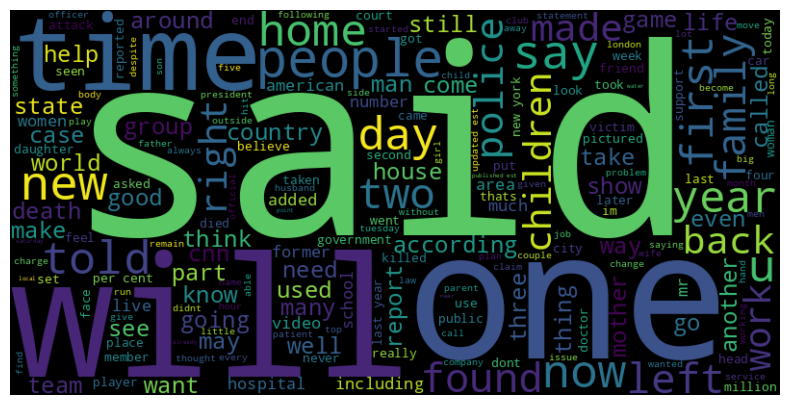

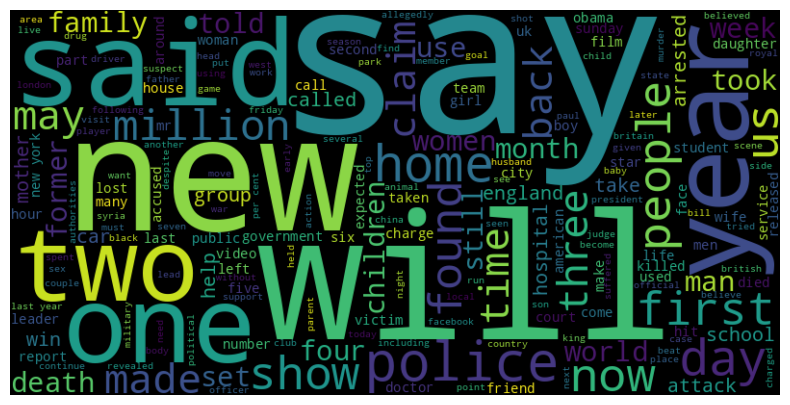

In [13]:
import random
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Convert 'article' and 'highlights' columns to lists
articles_list = train['article'].tolist()
highlights_list = train['highlights'].tolist()

# Sample a subset of articles and highlights
sample_size = 1000  # Adjust this to change the sample size
sample_articles = random.sample(articles_list, sample_size)
sample_highlights = random.sample(highlights_list, sample_size)

# Generate word cloud for the sampled 'article' column
article_text = ' '.join(sample_articles)
generate_wordcloud(article_text)

# Generate word cloud for the sampled 'highlights' column
highlights_text = ' '.join(sample_highlights)
generate_wordcloud(highlights_text)

<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);"> * Expand Contractions *</div>

In [14]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

train['article'] = train['article'].apply(expand_contractions)
train['highlights'] = train['highlights'].apply(expand_contractions)

test['article'] = test['article'].apply(expand_contractions)
test['highlights'] = test['highlights'].apply(expand_contractions)

val['article'] = val['article'].apply(expand_contractions)
val['highlights'] = val['highlights'].apply(expand_contractions)

<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);"> * Removing Stopwords *  </div>

In [16]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    
    words = word_tokenize(text)
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

train['article'] = train['article'].apply(remove_stopwords)
train['highlights'] = train['highlights'].apply(remove_stopwords)

test['article'] = test['article'].apply(remove_stopwords)
test['highlights'] = test['highlights'].apply(remove_stopwords)

val['article'] = val['article'].apply(remove_stopwords)
val['highlights'] = val['highlights'].apply(remove_stopwords)

<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);"> * Stemming * </div>

In [17]:
#def do_stemming(token_words):
#    ps = PorterStemmer()
#    words = token_words.split()
#    return [ps.stem(word) for word in words]

#train['article'] = train['article'].apply(do_stemming)
#train['highlights'] = train['highlights'].apply(do_stemming)

#test['article'] = test['article'].apply(do_stemming)
#test['highlights'] = test['highlights'].apply(do_stemming)

#val['article'] = val['article'].apply(do_stemming)
#val['highlights'] = val['highlights'].apply(do_stemming)

<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);"> * Tokenization * </div>

In [18]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    return tokens

train['article_tokens'] = train['article'].apply(tokenize_text)
train['highlights_tokens'] = train['highlights'].apply(tokenize_text)

test['article_tokens'] = test['article'].apply(tokenize_text)
test['highlights_tokens'] = test['highlights'].apply(tokenize_text)

val['article_tokens'] = val['article'].apply(tokenize_text)
val['highlights_tokens'] = val['highlights'].apply(tokenize_text)

In [19]:
train['article_text'] = train['article_tokens'].apply(' '.join)
train['highlights_text'] = train['highlights_tokens'].apply(' '.join)

test['article_text'] = test['article_tokens'].apply(' '.join)
test['highlights_text'] = test['highlights_tokens'].apply(' '.join)

val['article_text'] = val['article_tokens'].apply(' '.join)
val['highlights_text'] = val['highlights_tokens'].apply(' '.join)


In [20]:
train.sample(3)

,id,article,highlights,article_tokens,highlights_tokens,article_text,highlights_text
179237,740d64b5b3a38dc5f6a776ae32f6b66bc3a2ae18,lizzie edmonds published 1003 est 10 february ...,carl neale 23 saw dealer hitting woman street ...,"[lizzie, edmonds, published, est, february, up...","[carl, neale, saw, dealer, hitting, woman, str...",lizzie edmonds published est february updated ...,carl neale saw dealer hitting woman street pun...
65194,b91af0e096e045df4bcd3240c0b01aa3f6397591,england recovered poor start twickenham early ...,stuart lancasters side secure 4717 victory twi...,"[england, recovered, poor, start, twickenham, ...","[stuart, lancasters, side, secure, victory, tw...",england recovered poor start twickenham early ...,stuart lancasters side secure victory twickenh...
250629,d05d6e25909230c34dcc596ab8a68daec6fcd203,sam webb published 1649 est 13 february 2013 u...,daniela holmqvist bitten qualifier australia u...,"[sam, webb, published, est, february, updated,...","[daniela, holmqvist, bitten, qualifier, austra...",sam webb published est february updated est fe...,daniela holmqvist bitten qualifier australia u...


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Create a tokenizer for articles
article_tokenizer = Tokenizer()
article_tokenizer.fit_on_texts(train['article_tokens'])

# Convert article tokens to sequences of integers
train_article_sequences = article_tokenizer.texts_to_sequences(train['article_tokens'])
test_article_sequences = article_tokenizer.texts_to_sequences(test['article_tokens'])
val_article_sequences = article_tokenizer.texts_to_sequences(val['article_tokens'])

<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);"> * Padding * </div>

In [22]:
# Pad article sequences
max_article_length = 500  # Adjust as needed
train_article_padded = pad_sequences(train_article_sequences, maxlen=max_article_length, padding='post')
test_article_padded = pad_sequences(test_article_sequences, maxlen=max_article_length, padding='post')
val_article_padded = pad_sequences(val_article_sequences, maxlen=max_article_length, padding='post')

In [23]:
# Create a tokenizer for highlights
highlights_tokenizer = Tokenizer()
highlights_tokenizer.fit_on_texts(train['highlights_tokens'])

# Convert highlights tokens to sequences of integers
train_highlights_sequences = highlights_tokenizer.texts_to_sequences(train['highlights_tokens'])
test_highlights_sequences = highlights_tokenizer.texts_to_sequences(test['highlights_tokens'])
val_highlights_sequences = highlights_tokenizer.texts_to_sequences(val['highlights_tokens'])

In [24]:
# Pad highlights sequences
max_highlights_length = 100  # Adjust as needed
train_highlights_padded = pad_sequences(train_highlights_sequences, maxlen=max_highlights_length, padding='post')
test_highlights_padded = pad_sequences(test_highlights_sequences, maxlen=max_highlights_length, padding='post')
val_highlights_padded = pad_sequences(val_highlights_sequences, maxlen=max_highlights_length, padding='post')

<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);"> * Shape of Padded Article *</div>

In [25]:
print("Train Article Padded Shape:", train_article_padded.shape)
print("Test Article Padded Shape:", test_article_padded.shape)
print("Validation Article Padded Shape:", val_article_padded.shape)

print("Train Highlights Padded Shape:", train_highlights_padded.shape)
print("Test Highlights Padded Shape:", test_highlights_padded.shape)
print("Validation Highlights Padded Shape:", val_highlights_padded.shape)

Train Article Padded Shape: (80000, 500)
Test Article Padded Shape: (11490, 500)
Validation Article Padded Shape: (13368, 500)
Train Highlights Padded Shape: (80000, 100)
Test Highlights Padded Shape: (11490, 100)
Validation Highlights Padded Shape: (13368, 100)


In [26]:
# Determine the maximum index in the data
max_article_index = max([max(seq) for seq in train_article_sequences])
max_highlight_index = max([max(seq) for seq in train_highlights_sequences])

# Set the vocabulary size to be at least one more than the maximum index
vocab_size_article = max_article_index + 1
vocab_size_highlight = max_highlight_index + 1
print("====================================================")
print("Vocabulary Size of article:", vocab_size_article)
print("====================================================")
print("Vocabulary Size of highlights:", vocab_size_highlight)
print("====================================================")

Vocabulary Size of article: 327433
Vocabulary Size of highlights: 99230


<div style="color:#3498DB; background-color:#E74C3C; padding: 15px; border-radius: 10px; font-size: 150%; font-family: 'Arial', sans-serif; text-align:center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.5);"> * Padded Sequence -> Tensors * </div>

In [27]:
# Convert padded sequences to tensors
train_article_tensor = torch.tensor(train_article_padded, dtype=torch.long)
train_highlights_tensor = torch.tensor(train_highlights_padded, dtype=torch.long)

val_article_tensor = torch.tensor(val_article_padded, dtype=torch.long)
val_highlights_tensor = torch.tensor(val_highlights_padded, dtype=torch.long)

test_article_tensor = torch.tensor(test_article_padded, dtype=torch.long)
test_highlights_tensor = torch.tensor(test_highlights_padded, dtype=torch.long)

In [28]:
from torch.utils.data import DataLoader, TensorDataset

In [29]:
train_dataset = TensorDataset(train_article_tensor, train_highlights_tensor)
val_dataset = TensorDataset(val_article_tensor, val_highlights_tensor)
test_dataset = TensorDataset(test_article_tensor, test_highlights_tensor)

In [30]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥Model (T5) Architecture🔥</div>

![](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F3f25f11e-1daf-4711-940a-6b09a1f62ae7_2298x1474.png)

In [31]:
import torch.nn as nn
class T5Model(nn.Module):
    def __init__(self, vocab_size, d_model=512, num_layers=6, num_heads=8, d_ff=2048, dropout_rate=0.1):
        super(T5Model, self).__init__()

        self.embedding = nn.Embedding(vocab_size, d_model)

        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=num_heads, dim_feedforward=d_ff, dropout=dropout_rate),
            num_layers
        )

        self.decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=d_model, nhead=num_heads, dim_feedforward=d_ff, dropout=dropout_rate),
            num_layers
        )

        self.linear = nn.Linear(d_model, vocab_size)

    def forward(self, src, tgt):
        src = self.embedding(src).transpose(0, 1)
        tgt = self.embedding(tgt).transpose(0, 1)

        memory = self.encoder(src)
        output = self.decoder(tgt, memory)
        output = self.linear(output.transpose(0, 1))
        return output

In [32]:
model = T5Model(vocab_size_article)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🛠MODEL TRAINING🛠 </div>

* **Train the model with better GPU system, i am not going to train because of my GPU system**

In [38]:
"""from tqdm import tqdm

loss_values = []
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

# Training loop
num_epochs = 3  # Adjusted number of epochs
batch_size = 4  # Lower batch size
accumulation_steps = 4  # Accumulate gradients over 4 steps before updating

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0
    true_positives = 0
    predicted_positives = 0
    actual_positives = 0
    
    # Wrap the train_loader with tqdm to visualize progress
    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as t:
        for idx, (articles, highlights) in enumerate(train_loader):  
            optimizer.zero_grad()

            # Forward pass
            outputs = model(articles, highlights)  

            # Compute the loss
            loss = criterion(outputs.transpose(1, 2), highlights)  # Transpose for CrossEntropyLoss

            # Backpropagation
            loss.backward()

            # Accumulate gradients every accumulation_steps steps
            if (idx + 1) % accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()

            running_loss += loss.item() * batch_size  

            # Compute metrics
            predicted = torch.argmax(outputs, dim=2)
            correct = torch.sum(predicted == highlights).item()
            total_correct += correct
            total_samples += batch_size * highlights.size(1)

            true_positives += torch.sum((predicted == 1) & (highlights == 1)).item()
            predicted_positives += torch.sum(predicted == 1).item()
            actual_positives += torch.sum(highlights == 1).item()

            # Update tqdm description with loss and accuracy
            t.set_postfix(loss=running_loss / (idx + 1) / total_samples, accuracy=total_correct / total_samples)
            t.update()

        # If there are remaining accumulated gradients, perform one more update
        if (idx + 1) % accumulation_steps != 0:
            optimizer.step()

    # Calculate metrics
    epoch_loss = running_loss / len(train_dataset)
    epoch_accuracy = total_correct / total_samples
    epoch_precision = true_positives / predicted_positives if predicted_positives > 0 else 0
    epoch_recall = true_positives / actual_positives if actual_positives > 0 else 0
    epoch_f1 = 2 * (epoch_precision * epoch_recall) / (epoch_precision + epoch_recall) if (epoch_precision + epoch_recall) > 0 else 0

    # Store metric values
    loss_values.append(epoch_loss)
    accuracy_values.append(epoch_accuracy)
    precision_values.append(epoch_precision)
    recall_values.append(epoch_recall)
    f1_values.append(epoch_f1)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss}, Accuracy: {epoch_accuracy}, Precision: {epoch_precision}, Recall: {epoch_recall}, F1 Score: {epoch_f1}')
"""

"from tqdm import tqdm\n\nloss_values = []\naccuracy_values = []\nprecision_values = []\nrecall_values = []\nf1_values = []\n\n# Training loop\nnum_epochs = 3  # Adjusted number of epochs\nbatch_size = 4  # Lower batch size\naccumulation_steps = 4  # Accumulate gradients over 4 steps before updating\n\ntrain_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)\n\nfor epoch in range(num_epochs):\n    model.train()\n    running_loss = 0.0\n    total_correct = 0\n    total_samples = 0\n    true_positives = 0\n    predicted_positives = 0\n    actual_positives = 0\n    \n    # Wrap the train_loader with tqdm to visualize progress\n    with tqdm(total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as t:\n        for idx, (articles, highlights) in enumerate(train_loader):  \n            optimizer.zero_grad()\n\n            # Forward pass\n            outputs = model(articles, highlights)  \n\n            # Compute the loss\n            loss = criteri

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📉MODEL TRAINING GRAPH📈</div>

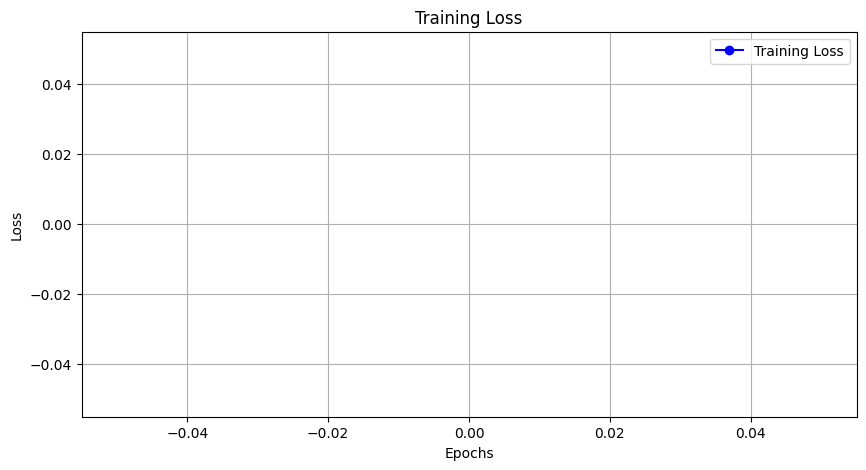

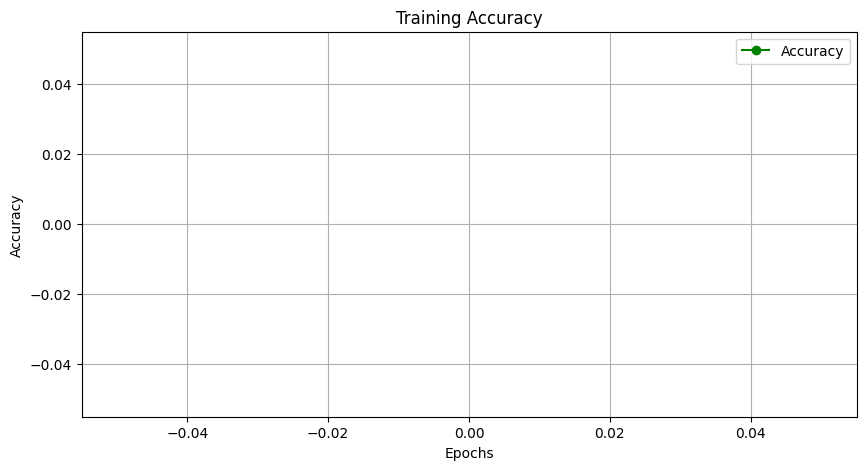

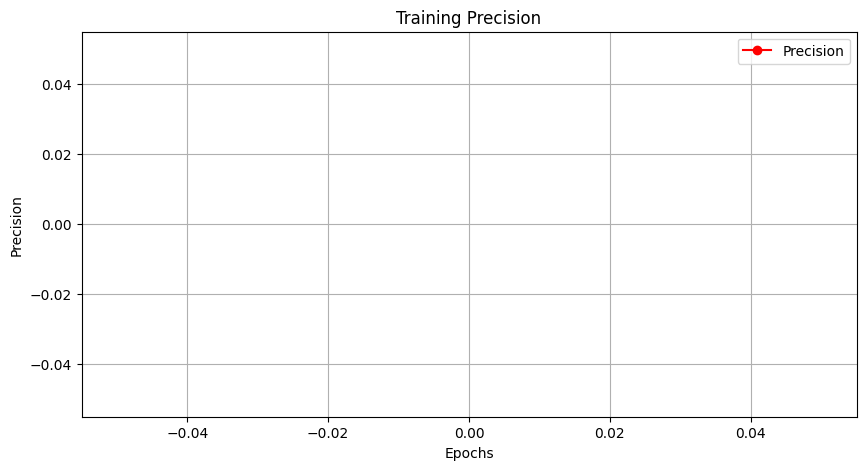

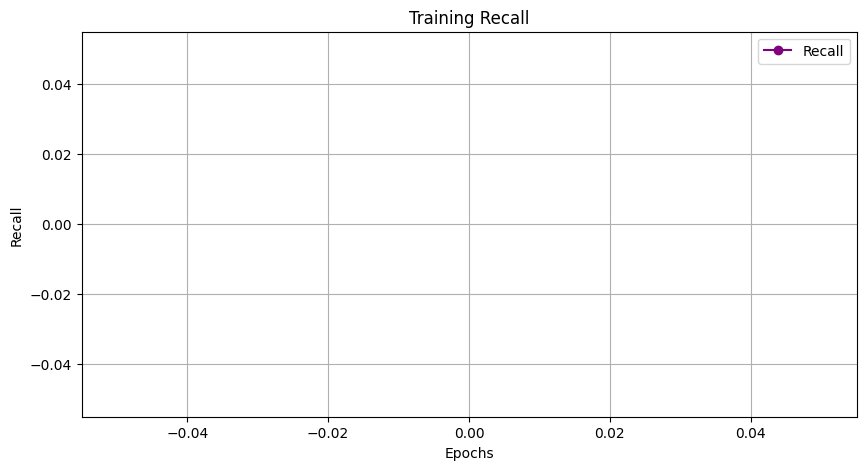

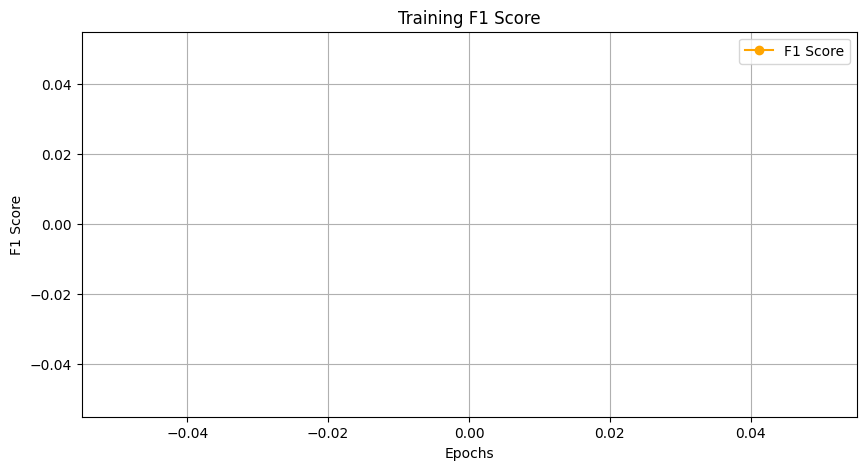

In [37]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(loss_values, label='Training Loss', color='blue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(accuracy_values, label='Accuracy', color='green', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot precision
plt.figure(figsize=(10, 5))
plt.plot(precision_values, label='Precision', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training Precision')
plt.legend()
plt.grid(True)
plt.show()

# Plot recall
plt.figure(figsize=(10, 5))
plt.plot(recall_values, label='Recall', color='purple', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Training Recall')
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 score
plt.figure(figsize=(10, 5))
plt.plot(f1_values, label='F1 Score', color='orange', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Training F1 Score')
plt.legend()
plt.grid(True)
plt.show()

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔍 MODEL EVALUATION 🔍</div>

In [44]:
"""# Define your test DataLoader
#test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Set model to evaluation mode
model.eval()

# Initialize variables to store evaluation metrics
test_loss = 0.0
test_total_correct = 0
test_total_samples = 0
test_true_positives = 0
test_predicted_positives = 0
test_actual_positives = 0

# Iterate over test data
for idx, (test_articles, test_highlights) in enumerate(test_loader):
    # Forward pass
    with torch.no_grad():  # No need to compute gradients during evaluation
        test_outputs = model(test_articles, test_highlights)

    # Compute the loss
    test_loss += criterion(test_outputs.transpose(1, 2), test_highlights).item() * batch_size

    # Compute metrics
    test_predicted = torch.argmax(test_outputs, dim=2)
    test_correct = torch.sum(test_predicted == test_highlights).item()
    test_total_correct += test_correct
    test_total_samples += batch_size * test_highlights.size(1)

    test_true_positives += torch.sum((test_predicted == 1) & (test_highlights == 1)).item()
    test_predicted_positives += torch.sum(test_predicted == 1).item()
    test_actual_positives += torch.sum(test_highlights == 1).item()

# Calculate evaluation metrics
test_loss /= len(test_dataset)
test_accuracy = test_total_correct / test_total_samples
test_precision = test_true_positives / test_predicted_positives if test_predicted_positives > 0 else 0
test_recall = test_true_positives / test_actual_positives if test_actual_positives > 0 else 0
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall) if (test_precision + test_recall) > 0 else 0

# Print or store evaluation metrics
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Precision: {test_precision}, Test Recall: {test_recall}, Test F1 Score: {test_f1}')"""

"# Define your test DataLoader\n#test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)\n\n# Set model to evaluation mode\nmodel.eval()\n\n# Initialize variables to store evaluation metrics\ntest_loss = 0.0\ntest_total_correct = 0\ntest_total_samples = 0\ntest_true_positives = 0\ntest_predicted_positives = 0\ntest_actual_positives = 0\n\n# Iterate over test data\nfor idx, (test_articles, test_highlights) in enumerate(test_loader):\n    # Forward pass\n    with torch.no_grad():  # No need to compute gradients during evaluation\n        test_outputs = model(test_articles, test_highlights)\n\n    # Compute the loss\n    test_loss += criterion(test_outputs.transpose(1, 2), test_highlights).item() * batch_size\n\n    # Compute metrics\n    test_predicted = torch.argmax(test_outputs, dim=2)\n    test_correct = torch.sum(test_predicted == test_highlights).item()\n    test_total_correct += test_correct\n    test_total_samples += batch_size * test_highlights.size(1)\n\n   

![](https://static.fontget.com/t/h/thank-you/preview@2x.png)